his notebook goes over how to plot the GHI error, WPD error, and Fitness from a single OptWRF model realization

Last Updated Oct 15, 2020 by Jeff Sward

In [1]:
# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# python built-in 
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from wrf import to_np

# Import the optwrf module
import optwrf
from optwrf import runwrf 
from optwrf import helper_functions as hf
from optwrf import plots as owplt

/Users/swardy9230/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/pvlib-python/pvlib/wrfcast.py:20: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


### Load Required Data Files
Start by defining the file locations for the wrf simulation that you would like to create plots for. I generally put them in `~/optwrf/data/`

In [2]:
# Verbose setting
verbose = False

# Define the datestr, paramstr, and wrfout file names
datestr = '2011-12-13'
paramstr = '19mp4lw4sw7lsm8pbl99cu'
# paramstr = '8mp4lw4sw2lsm2pbl6cu'
wrffile_name = f'wrfout_processed_d01_{datestr}_{paramstr}.nc'
wrffile_name_orig = f'wrfout_d01_{datestr}_{paramstr}.nc'

# Find the absolute file path to your optwrf package
optwrf_abspath = os.path.dirname(os.path.abspath(inspect.getfile(optwrf)))
optwrf_abspath

# Specify the path to the processed wrfout file
wrfdir = os.path.join(optwrf_abspath, 'data/optwrf_sim/')
wrffile = os.path.join(wrfdir, wrffile_name)
wrfdata = xr.open_dataset(wrffile)
if verbose:
    print(f'Processeed WRF DATA:\n{wrfdata}\n')
    
# Open the processed ERA5 data
eradir = os.path.join(optwrf_abspath, 'data/')
erafile = os.path.join(eradir, 'ERA5_EastUS_WPD-GHI_2011-12.nc')
eradata = xr.open_dataset(erafile)
if verbose:
    print(f'ERA5 DATA:\n{eradata}')

### Create the plots
Begin with the basic ones. You can choose from fitness, ghi, wpd, ghi_error, or wpd_error

In [3]:
# fig_path = f'/Users/swardy9230/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
#     f'figures/hourly_WRF_fitness_plot_{datestr}_{paramstr}'
# owplt.wrf_era5_plot('fitness', wrfdata, eradata, datestr, src='wrf', hourly=True, save_fig=True,
#                     wrf_dir=wrfdir, era_dir=eradir, short_title_str='Model Fitness', fig_path=fig_path)

Next, are a set of plots comparing GHI and WPD from a WRF simulation to the ERA5 reanalysis

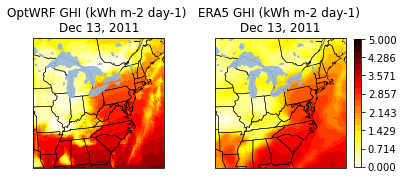

In [4]:
fig_path = f'/Users/swardy9230/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/' \
           f'figures/daily_WRF_ERA5_GHI_compare_plot_{datestr}_{paramstr}'
owplt.compare_wrf_era5_plot('ghi', wrfdata, eradata, hourly=False, save_fig=True, fig_path=fig_path)

Finally, there is a panel plot showing fitness, GHI error, and WPD error.

The file name is: bilinear_191x191_97x129.nc and reuse_weights is: False


/Users/swardy9230/opt/anaconda3/envs/optwrf/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Saving figure...


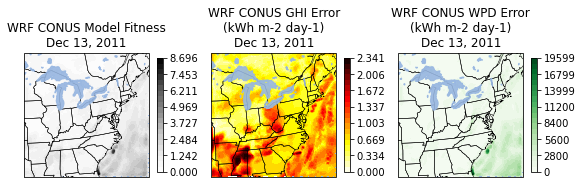

In [5]:
fig_path = f'/Users/swardy9230/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/figures/daily_GHI_WPD_Err_Fitness_plot_{datestr}_{paramstr}'
owplt.wrf_errorandfitness_plot(wrfdata, save_fig=True, wrf_dir=wrfdir, era_dir=eradir,
                             fig_path='./', verbose=False, fitness_short_title='WRF CONUS Model Fitness',
                             ghi_error_short_title='WRF CONUS GHI Error\n(kWh m-2 day-1)',
                             wpd_error_short_title='WRF CONUS WPD Error\n(kWh m-2 day-1)')